<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Forecasting_for_RES/blob/main/HPP_LW2_inflowKatun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [ ]:
#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sn

#Для моделей регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree

#Для разделения данных на выборки
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

#Для оценивания прогноза (метрики точности)
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

In [ ]:
def MAPE(y_t, y_p):
  y_t, y_p = np.array(y_t), np.array(y_p)
  Err=np.mean(np.abs((y_t - y_p)/y_t) * 100)
  return (Err)

In [ ]:
inflow_data2 = pd.read_excel('/content/Initial_data_PW2.xlsx', sheet_name= 'В7.Катунь')
data = pd.DataFrame(data=inflow_data2)
data

,Месяцы/годы,1,2,3,4,5,6,7,8,9,10,11,12
0,1932,100,150,220,560,4090,820,380,300,360,210,125,90
1,1933,130,140,175,365,2680,760,700,500,240,200,120,110
2,1934,105,130,145,280,1920,385,680,510,220,190,110,100
3,1935,110,145,180,300,4000,750,610,450,200,210,150,85
4,1936,105,105,140,210,1020,4210,740,370,250,210,115,95
5,1937,130,135,170,245,555,2080,820,540,250,250,135,115
6,1938,130,150,180,210,4440,950,690,520,310,180,170,120
7,1939,120,125,150,210,5540,490,470,260,230,150,120,90
8,1940,130,180,200,240,2320,535,840,610,280,190,110,100
9,1941,140,110,135,210,1770,520,610,245,200,160,100,95


# Новый раздел

In [ ]:
# Установка первого столбца в качестве индекса строк
data.set_index(data.iloc[:, 0], inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12
Месяцы/годы,,,,,,,,,,,,
1932,100,150,220,560,4090,820,380,300,360,210,125,90
1933,130,140,175,365,2680,760,700,500,240,200,120,110
1934,105,130,145,280,1920,385,680,510,220,190,110,100
1935,110,145,180,300,4000,750,610,450,200,210,150,85
1936,105,105,140,210,1020,4210,740,370,250,210,115,95
1937,130,135,170,245,555,2080,820,540,250,250,135,115
1938,130,150,180,210,4440,950,690,520,310,180,170,120
1939,120,125,150,210,5540,490,470,260,230,150,120,90
1940,130,180,200,240,2320,535,840,610,280,190,110,100


In [ ]:
# Преобразование DataFrame в Series
series = data.stack()
print(series)

Месяцы/годы    
1932         1      100
             2      150
             3      220
             4      560
             5     4090
                   ... 
1972         8      540
             9      210
             10     200
             11     180
             12     175
Length: 492, dtype: int64


In [ ]:
data.dtypes

1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
dtype: object

In [ ]:
# Создание новой серии со сдвинутыми значениями
data_shift = series.shift(-1)[0:]
data_shift = data_shift.iloc[:-1]
data_shift

Месяцы/годы    
1932         1      150.0
             2      220.0
             3      560.0
             4     4090.0
             5      820.0
                    ...  
1972         7      540.0
             8      210.0
             9      200.0
             10     180.0
             11     175.0
Length: 491, dtype: float64

In [ ]:
series = series.iloc[:-1]

In [ ]:
X = data_shift
y = series

In [ ]:
X_train = X.iloc[0:round(len(data_shift)*0.8)]
y_train = y.iloc[0:round(len(series)*0.8)]
X_test = X.iloc[round(len(data_shift)*0.8):]
y_test = y.iloc[round(len(series)*0.8):]
#сохраняем тестовую выборку на всякий случай
y_test.to_excel('/y_test.xlsx')
X_test.to_excel('/X_test.xlsx')

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

##Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
scoring  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores = cross_validate(lin_reg, X_train, y_train, scoring = scoring, cv=ShuffleSplit(n_splits=4))
y_pred = lin_reg.predict(X_test)
print('Cross-Validation errors')
DF_reg = pd.DataFrame(scores)
display(DF_reg)
print('Test errors')
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred))

Cross-Validation errors


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.001766,0.001840,-0.726942,-2.134888e+05,-389.521124,-1740.312103
1,0.001132,0.001241,-0.004466,-1.648707e+06,-691.446938,-4705.026611
2,0.001088,0.001583,0.024846,-2.697006e+05,-364.013410,-1468.087668
3,0.001648,0.003388,0.008070,-1.262539e+06,-534.737335,-5662.174155


Test errors
Mean squared error on test_set: 1035027.4813
Root Mean Square Error on test_set: 1017.3630
Root Absolute Percented Error on test_set: 168.1483
R2  on test_set: -0.0035


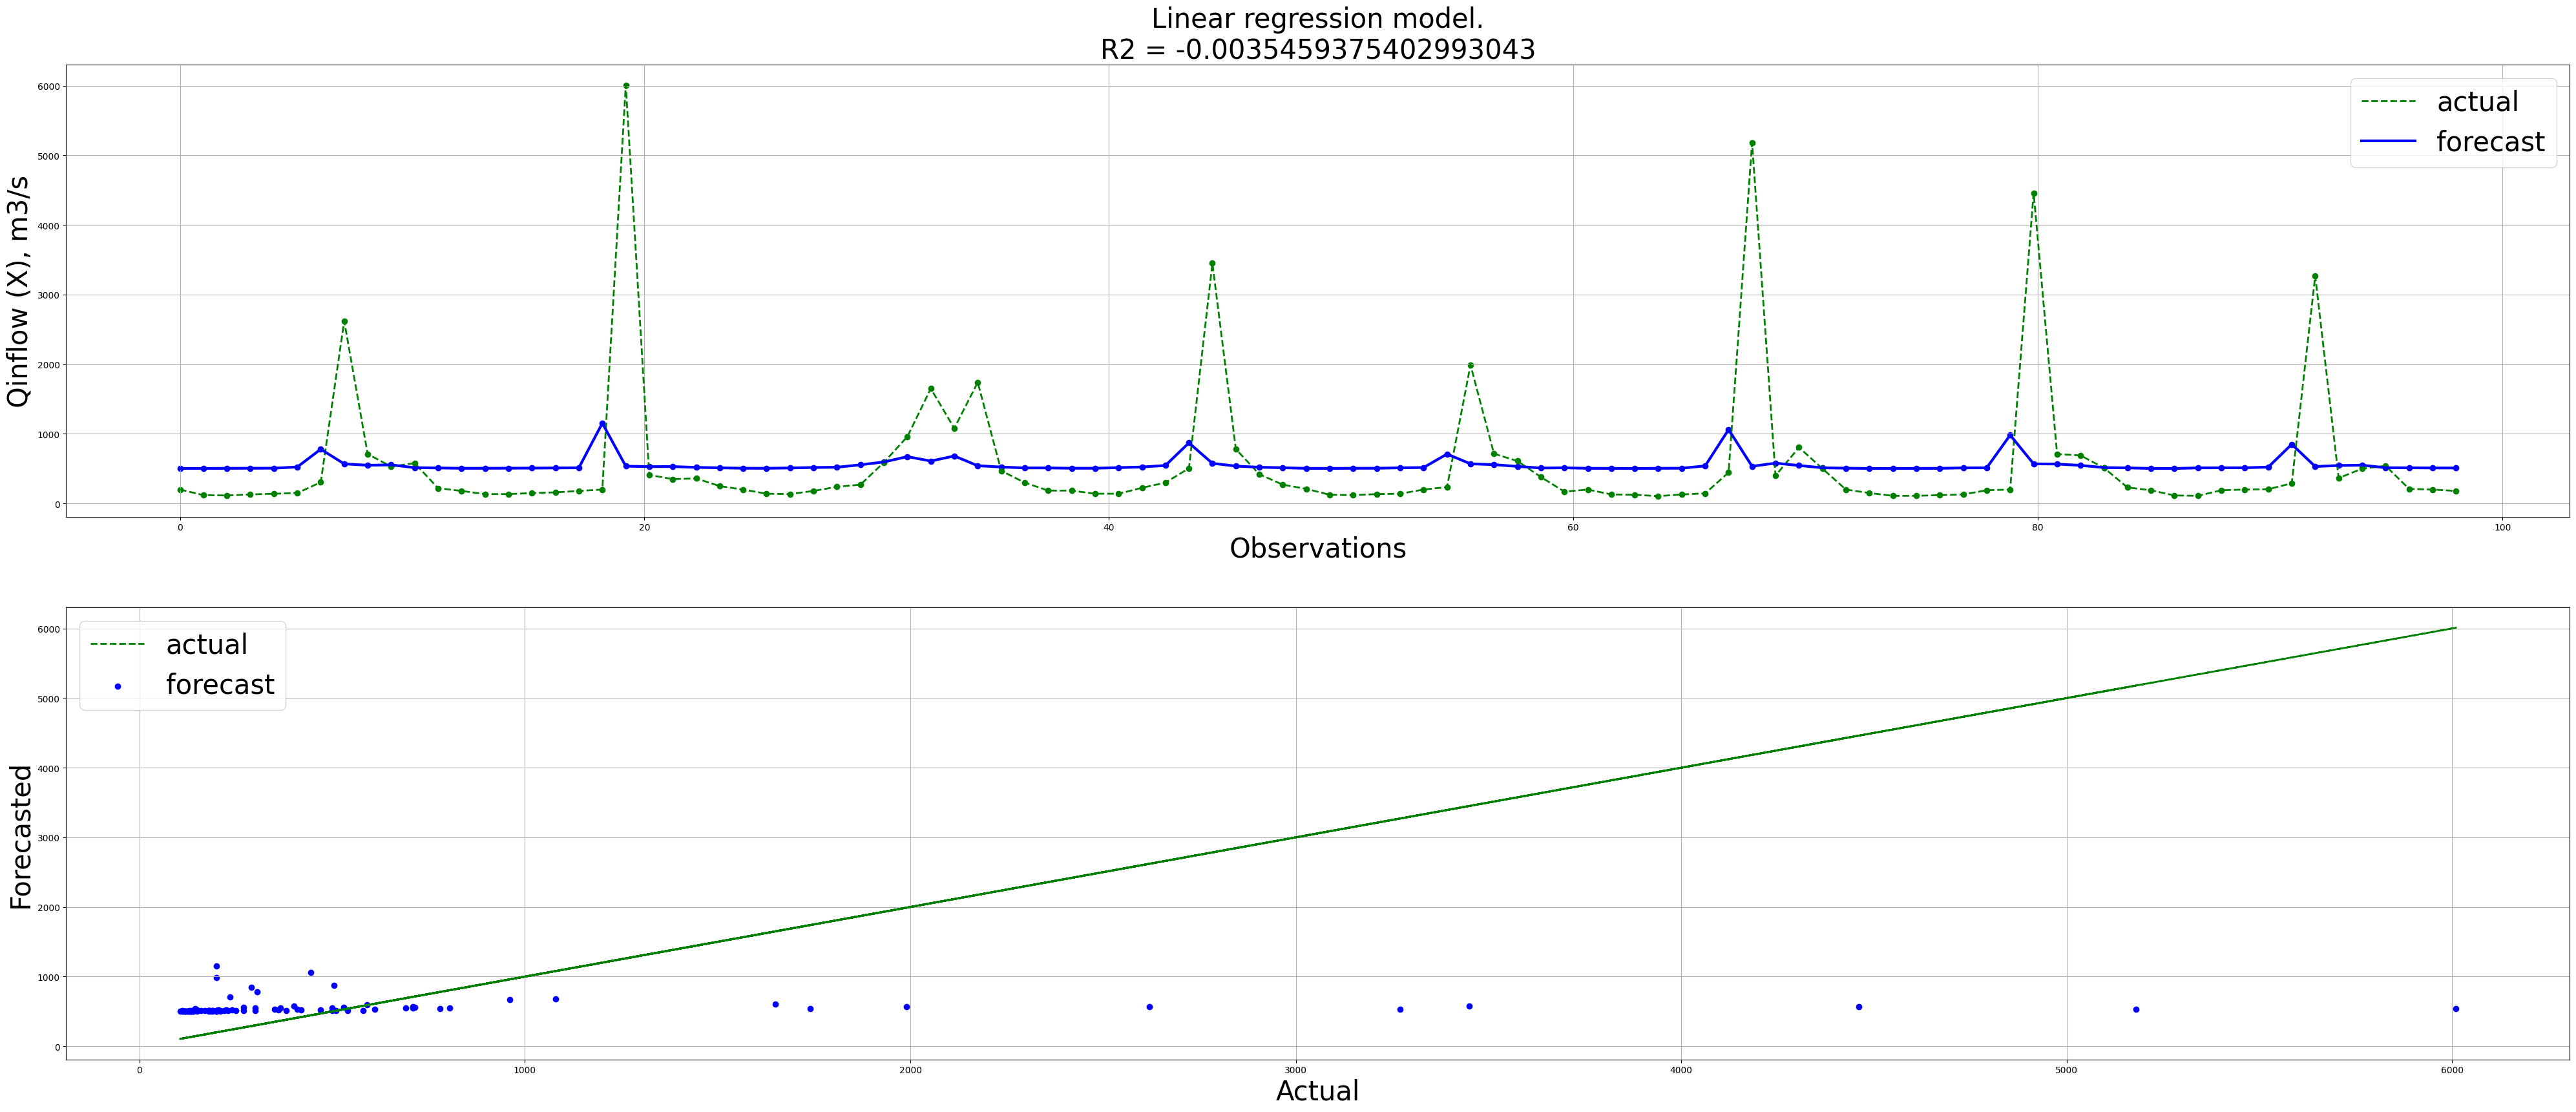

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Linear regression model.\nR2 = {r2_score(y_test,y_pred)}', fontsize=30)
plt.scatter(x, y_pred, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

##Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.pipeline import Pipeline

In [ ]:
PF = poly(degree=3, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.012904,0.001825,0.347829,-8.438715e+05,-353.546848,-3845.024669
1,0.003529,0.002176,0.008059,-2.789462e+05,-305.310665,-2109.033524
2,0.019458,0.005329,-0.060171,-1.250835e+06,-549.804243,-4729.029830
3,0.002786,0.009851,-0.255938,-3.449097e+05,-415.164915,-1578.733396
4,0.003130,0.009665,0.252626,-8.398265e+05,-460.128294,-3580.531949


Mean squared error on test_set: 852487.2645
Root Mean Square Error on test_set: 923.3024
Root Absolute Percented Error on test_set: 195.7169
R2  on test_set: 0.1734


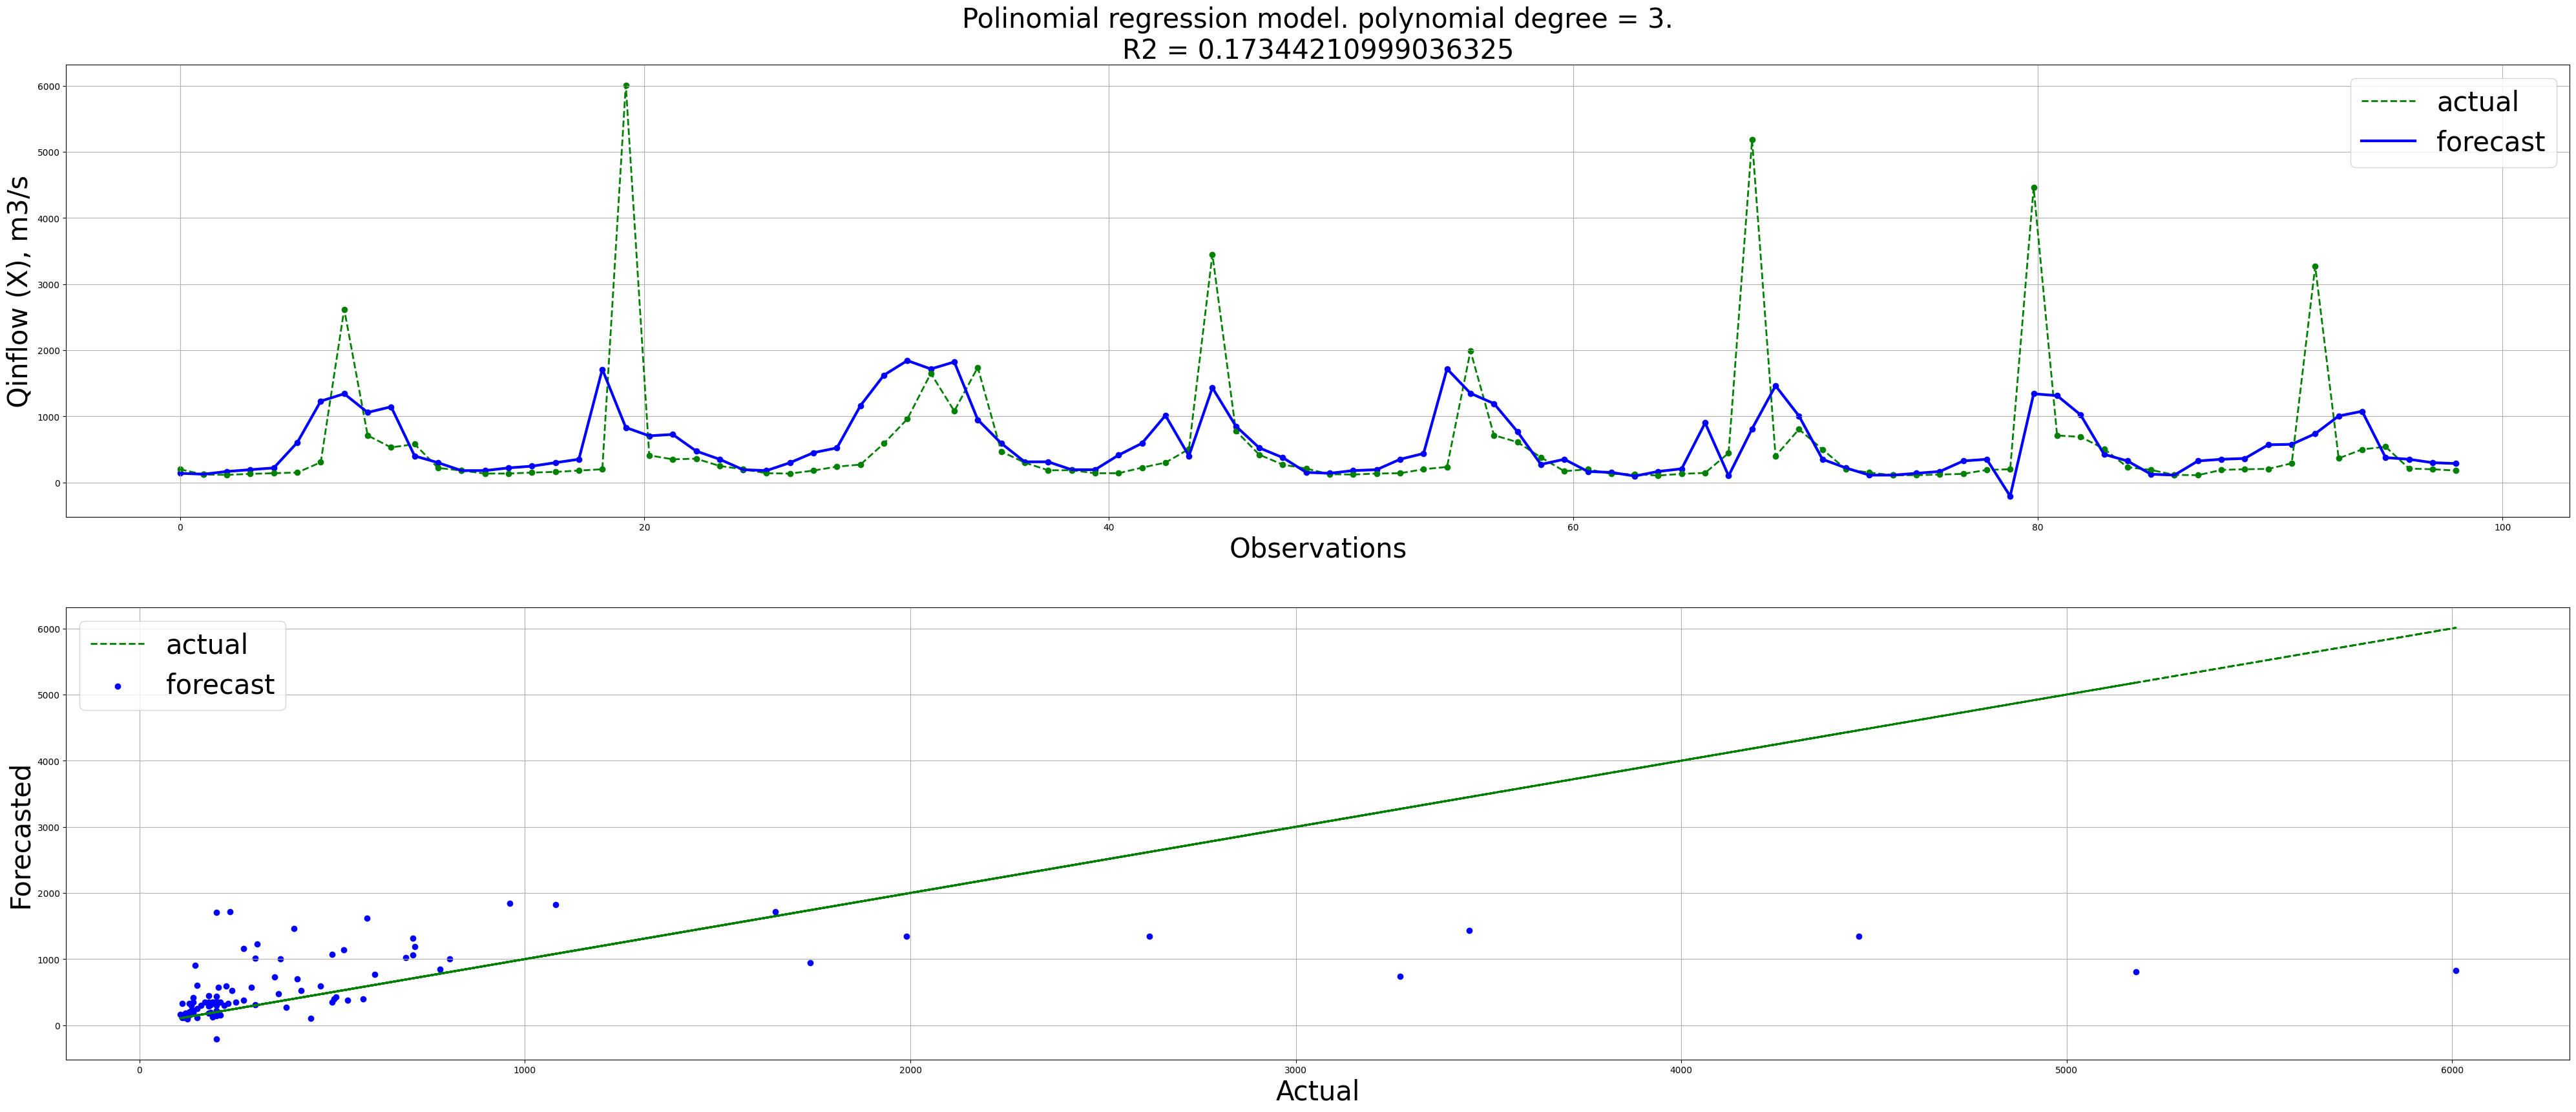

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()